In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
df = pd.read_csv('Data/airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [6]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [7]:
df.index.freq = 'MS'

In [8]:
train_data = df.iloc[:109]
test_data = df.iloc[108:]

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()
fitted_model

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [11]:
test_pred = fitted_model.forecast(12*3) # 3년
test_pred

1958-02-01    339.142909
1958-03-01    399.281633
1958-04-01    394.233568
1958-05-01    402.545228
1958-06-01    473.128705
1958-07-01    521.795269
1958-08-01    514.513585
1958-09-01    446.216803
1958-10-01    385.430937
1958-11-01    339.645088
1958-12-01    381.455644
1959-01-01    401.210143
1959-02-01    387.159136
1959-03-01    455.812366
1959-04-01    450.049591
1959-05-01    459.538024
1959-06-01    540.114788
1959-07-01    595.671618
1959-08-01    587.358985
1959-09-01    509.392669
1959-10-01    440.000674
1959-11-01    387.732413
1959-12-01    435.462554
1960-01-01    458.013917
1960-02-01    441.973552
1960-03-01    520.346782
1960-04-01    513.768107
1960-05-01    524.599923
1960-06-01    616.584834
1960-07-01    680.007461
1960-08-01    670.517917
1960-09-01    581.513044
1960-10-01    502.296453
1960-11-01    442.627995
1960-12-01    497.115821
1961-01-01    522.860031
Freq: MS, dtype: float64

<AxesSubplot: xlabel='Month'>

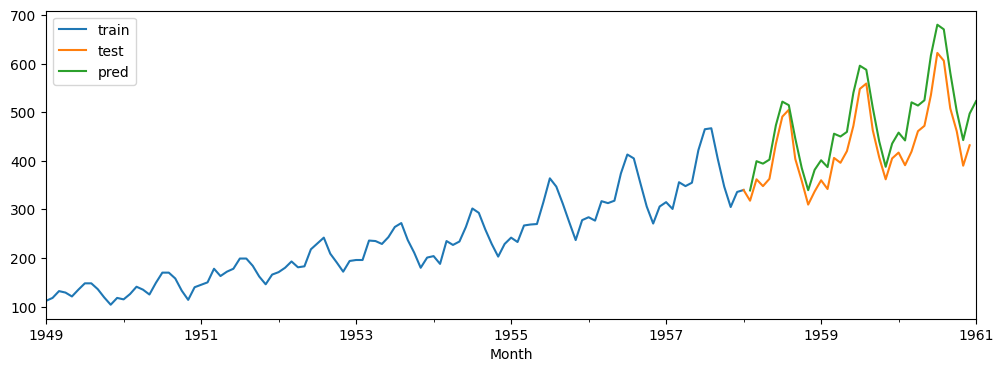

In [12]:
train_data['Thousands of Passengers'].plot(legend=True, label='train', figsize=(12,4))
test_data['Thousands of Passengers'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='pred')

<AxesSubplot: xlabel='Month'>

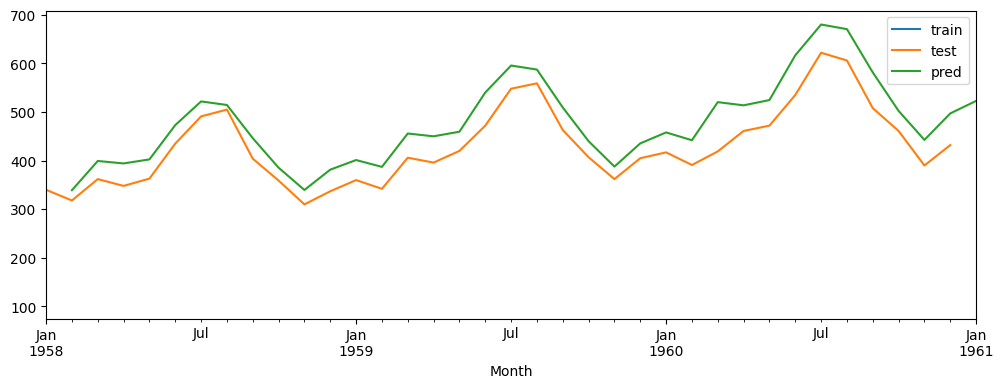

In [13]:
train_data['Thousands of Passengers'].plot(legend=True, label='train', figsize=(12,4))
test_data['Thousands of Passengers'].plot(legend=True, label='test')
test_pred.plot(legend=True, label='pred', xlim=['1958-01-01', '1961-01-01'])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [20]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [17]:
mean_absolute_error(test_data, test_pred)

63.031116584053684

In [18]:
mean_squared_error(test_data, test_pred)

5614.254329617054

In [19]:
np.sqrt(mean_squared_error(test_data, test_pred))

74.92832795156352

In [21]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/user/.pyenv/versions/3.8.13/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [22]:
forecast_predictions = final_model.forecast(36)

<AxesSubplot: xlabel='Month'>

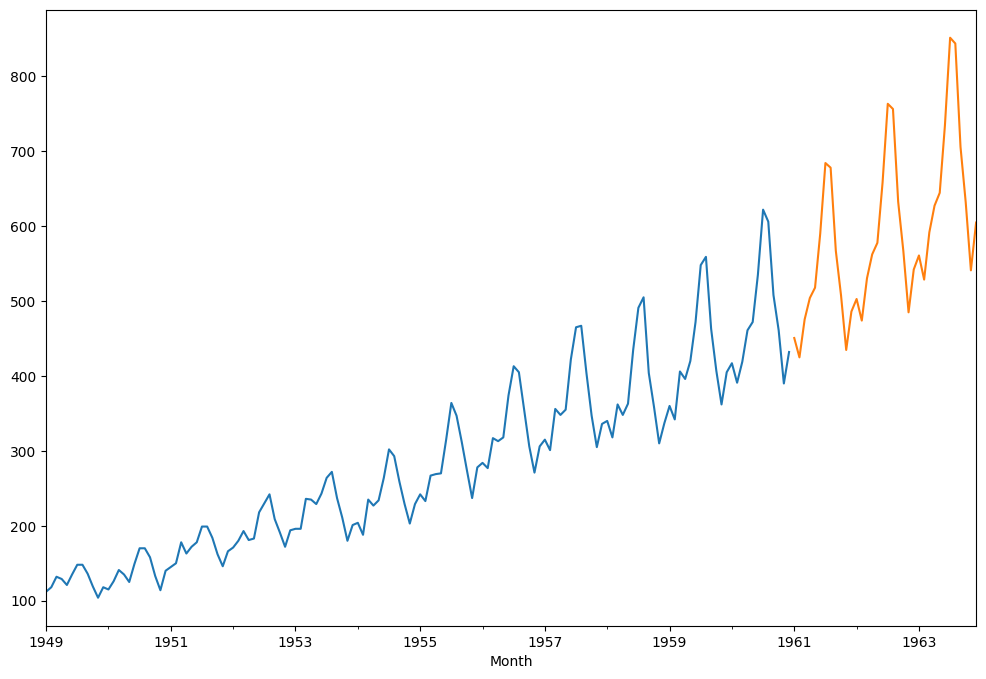

In [23]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot()

In [24]:
 df2 = pd.read_csv('Data/samples.csv', index_col=0, parse_dates=True)
 df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


<AxesSubplot: >

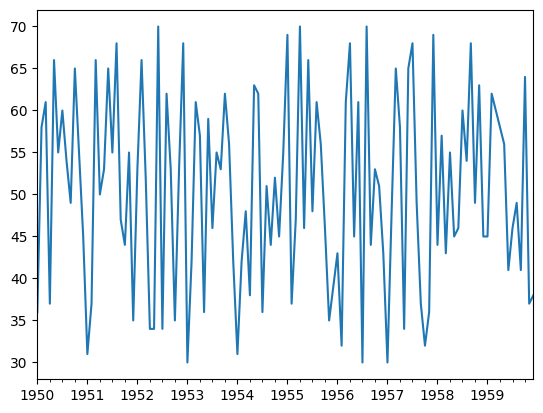

In [25]:
df2['a'].plot() # 정상 데이터

<AxesSubplot: >

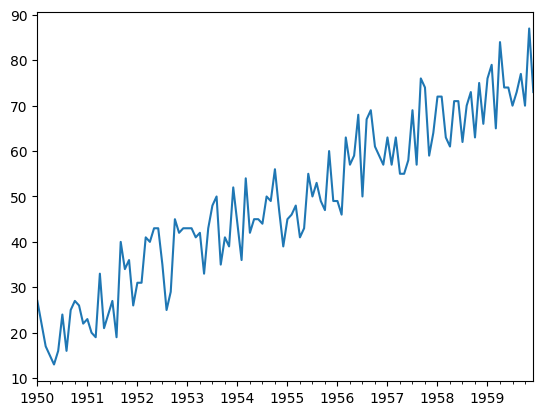

In [26]:
df2['b'].plot() # 비정상 데이터 

In [28]:
# 차분
df2['b'] - df2['b'].shift(1)

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [29]:
from statsmodels.tsa.statespace.tools import diff

In [30]:
diff(df2['b'], k_diff=1)

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

<AxesSubplot: >

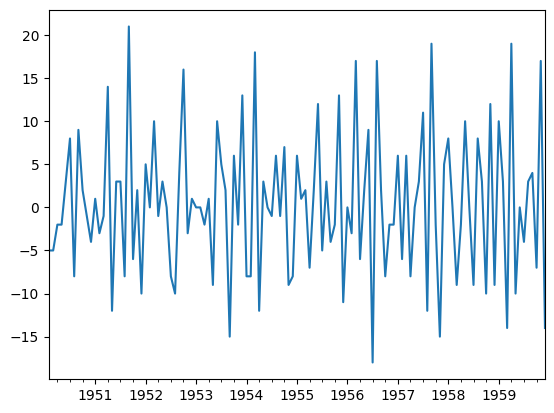

In [31]:
diff(df2['b'], k_diff=1).plot()